In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("temperatures_2019-2020.csv")

In [17]:
df.head()

,datum,day_cons,temperature,temp_diff
1,2019-06-16,11.0,22.6,-4.8
2,2019-06-17,8.0,21.2,-1.4
3,2019-06-18,6.0,23.2,2.0
4,2019-06-19,6.0,23.5,0.3
5,2019-06-20,8.0,22.1,-1.4


In [11]:
df.dropna(axis=0, inplace=True)

In [9]:
df["temp_moved"] = df["temperature"].shift(periods=1,axis=0)

In [13]:
df["temp_diff"] = df["temperature"] - df["temp_moved"]

In [16]:
df.drop("temp_moved", axis = 1,inplace=True)

Text(0.5, 1.0, 'Vývoj spotřeby a teploty v čase')

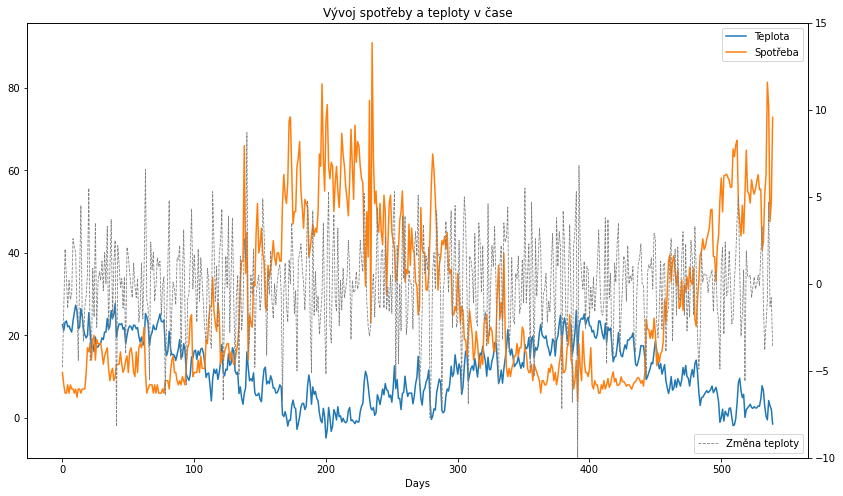

In [28]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(range(len(df)),df["temperature"], label="Teplota")
ax.plot(range(len(df)),df["day_cons"], label="Spotřeba")
ax.set_xlabel("Days")
ax.legend(loc=1)
ax1 = ax.twinx()
ax1.set_ylim(-10,15)
ax1.plot(range(len(df)),df["temp_diff"], lw=0.8, color="gray",ls="--", label="Změna teploty")
ax1.legend(loc=4)
plt.title("Vývoj spotřeby a teploty v čase")

In [30]:
df["temp_diff"].min()

-11.000000000000002

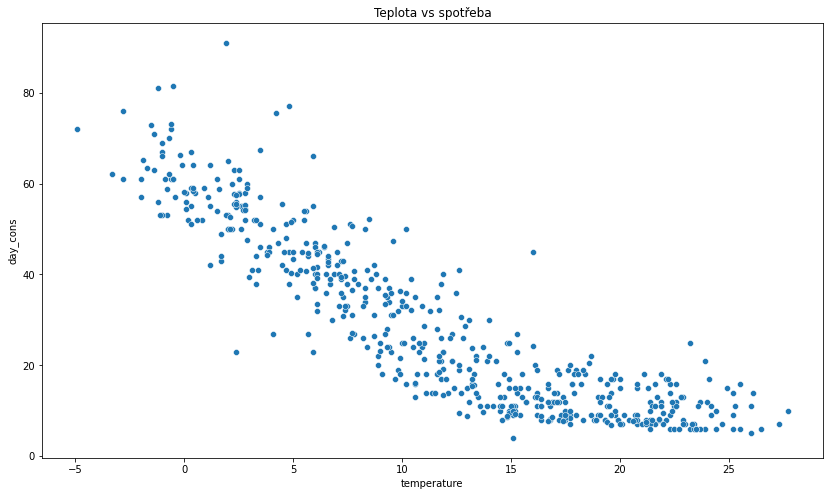

In [36]:
fig = plt.figure(figsize=(14,8))
sns.scatterplot(data=df, x="temperature",y="day_cons")
plt.title("Teplota vs spotřeba")
plt.show()

In [37]:
#Polynomial regression (1 simple)

In [38]:
X= df["temperature"]
y= df["day_cons"]

In [40]:
X_array = np.array(X)
X_array = X_array.reshape(-1,1)

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly_feat = PolynomialFeatures(degree=2)

In [44]:
X_poly = poly_feat.fit_transform(X_array)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
linear_model = LinearRegression()

In [50]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred = linear_model.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = MSE**(1/2)
MAE, RMSE

(5.523095427992223, 7.816218599355319)

In [56]:
y_all = linear_model.predict(X_poly)

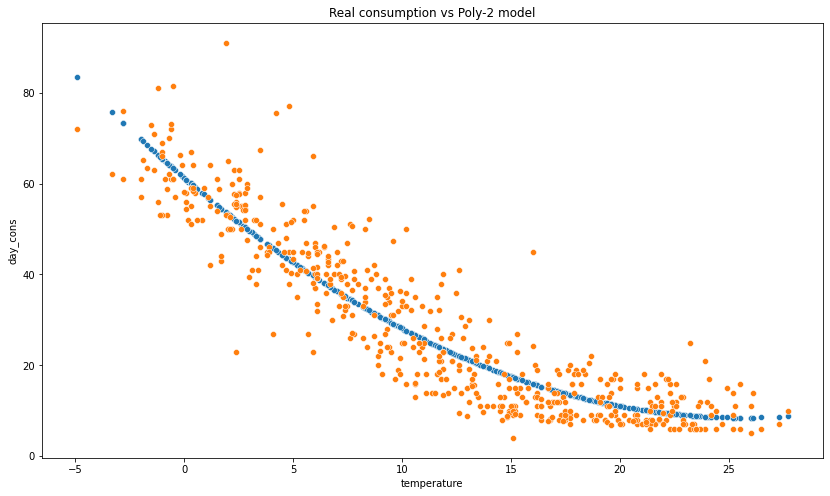

In [60]:
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(x=X, y=y_all, ax=ax)
sns.scatterplot(x=X, y=y, ax=ax)
plt.title("Real consumption vs Poly-2 model")
plt.show()

In [62]:
df.corr()

,day_cons,temperature,temp_diff
day_cons,1.000000,-0.896874,0.005566
temperature,-0.896874,1.000000,0.169732
temp_diff,0.005566,0.169732,1.000000


In [63]:
#Poly model with 2 features

In [64]:
X=df[["temperature","temp_diff"]]

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [67]:
poly_feat = PolynomialFeatures(degree=2, include_bias=False)

In [68]:
X_poly = poly_feat.fit_transform(X)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

In [74]:
poly_model = LinearRegression()

In [75]:
poly_model.fit(X_train,y_train)

LinearRegression()

In [76]:
y_pred = poly_model.predict(X_test)

In [77]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = MSE**(1/2)
MAE, RMSE

(4.868006272628602, 6.9153927705341065)

In [78]:
y_all = poly_model.predict(X_poly)

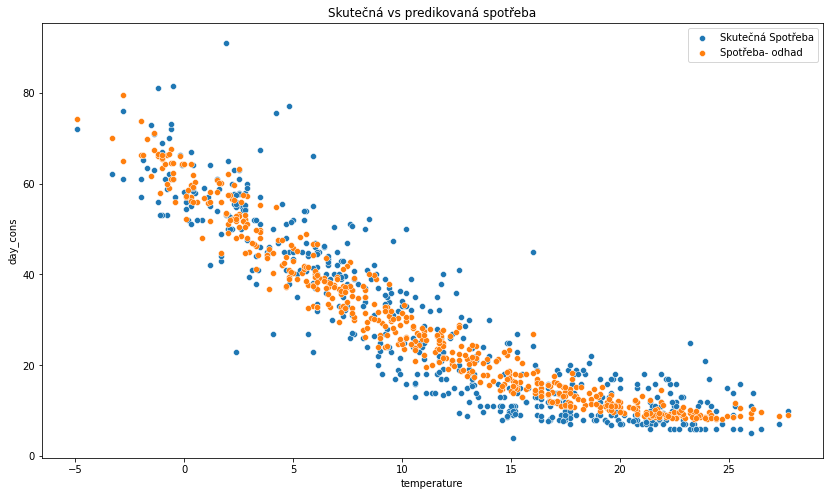

In [87]:
fig,ax = plt.subplots(figsize=(14,8))
sns.scatterplot(x=df["temperature"],y=y, label="Skutečná Spotřeba", ax=ax)
sns.scatterplot(x=df["temperature"],y=y_all, label="Spotřeba- odhad", ax=ax)
plt.title("Skutečná vs predikovaná spotřeba")
plt.show()

In [79]:
residuals = y-y_all

Text(0.5, 0.98, 'Residuals characteristics')

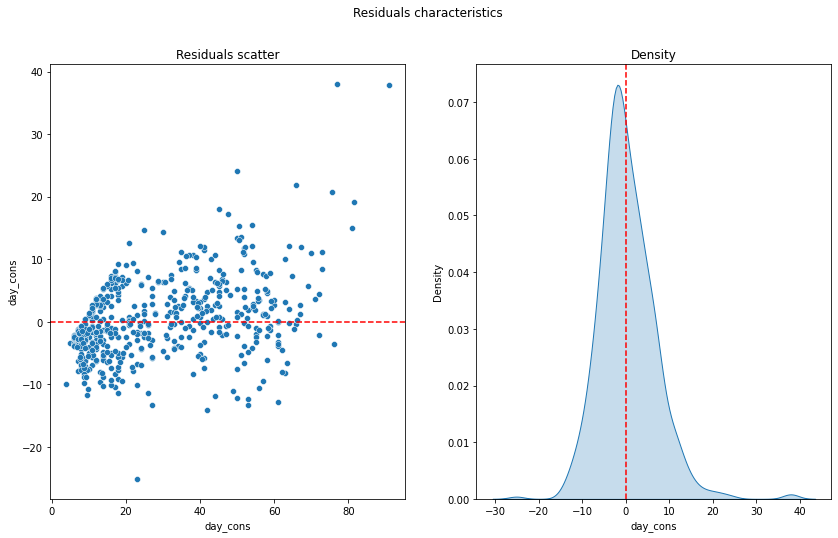

In [100]:
fig, ax = plt.subplots(figsize=(14,8),nrows=1, ncols=2)
sns.scatterplot(x=y, y=residuals, ax=ax[0])
ax[0].axhline(color="red",ls="--")
ax[0].set_title("Residuals scatter")
sns.kdeplot(x=residuals,ax=ax[1],shade=True)
ax[1].axvline(color="red",ls="--")
ax[1].set_title("Density")
plt.suptitle("Residuals characteristics")

In [101]:
#Ridge regression

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()

In [104]:
scaler.fit(X_train)

StandardScaler()

In [105]:
X_train_scaled = scaler.transform(X_train)

In [106]:
X_test_scaled = scaler.transform(X_test)

In [110]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [107]:
from sklearn.linear_model import RidgeCV

In [111]:
ridge = RidgeCV(cv=None, scoring='neg_mean_squared_error')

In [114]:
ridge.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_squared_error')

In [115]:
y_pred_ridge= ridge.predict(X_test_scaled)

In [116]:
MAE = mean_absolute_error(y_test, y_pred_ridge)
MSE = mean_squared_error(y_test,y_pred_ridge)
RMSE = MSE**(1/2)
MAE, RMSE

(4.871020270341785, 6.920256224866482)

In [117]:
ridge.alpha_

0.1

In [118]:
X_all = scaler.transform(X_poly)

In [119]:
y_all = ridge.predict(X_all)

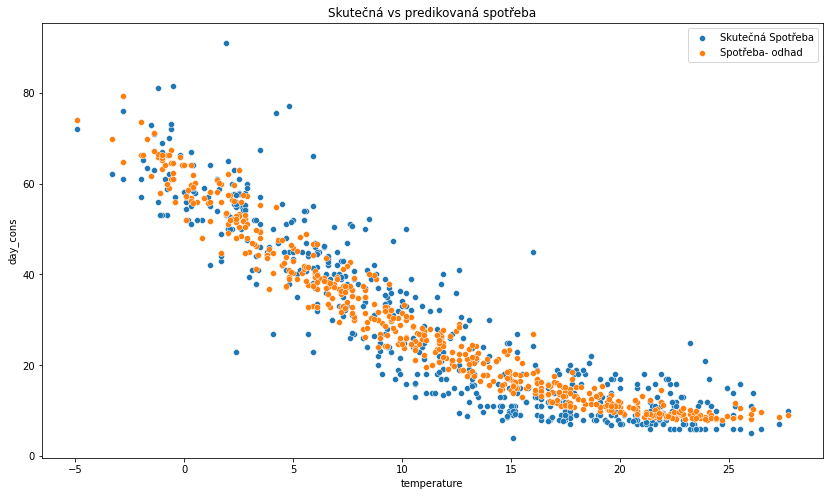

In [120]:
fig,ax = plt.subplots(figsize=(14,8))
sns.scatterplot(x=df["temperature"],y=y, label="Skutečná Spotřeba", ax=ax)
sns.scatterplot(x=df["temperature"],y=y_all, label="Spotřeba- odhad", ax=ax)
plt.title("Skutečná vs predikovaná spotřeba")
plt.show()

In [121]:
ridge.coef_

array([-31.61024774,   5.33062324,  15.20206487,  -2.69663999,
         0.66437246])

In [122]:
#Using the model

In [123]:
new_data = [[7.0,1.5]]

In [124]:
nd_poly = poly_feat.transform(new_data)

In [125]:
nd_poly

array([[ 7.  ,  1.5 , 49.  , 10.5 ,  2.25]])

In [126]:
nd_pred = poly_model.predict(nd_poly)

In [135]:
nd_pred[0]

38.60013847617793

In [140]:
interval = [nd_pred[0] + 1.96 * RMSE, nd_pred[0] - 1.96 * RMSE]

In [142]:
interval

[52.16384067691624, 25.036436275439627]